In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [49]:
# Find the most recent date in the data set.
# ('2017-08-23',)
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent

('2017-08-23',)

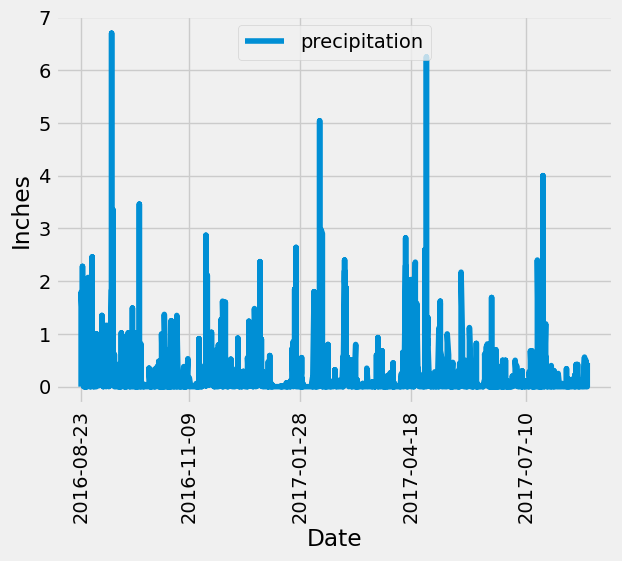

In [73]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = '2016-08-23'

# Perform a query to retrieve the data and precipitation scores
df = pd.read_sql("SELECT * FROM measurement WHERE date BETWEEN '2016-08-23' AND '2017-08-23'", conn)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = df.dropna(how='any')

# Sort the dataframe by date
df = df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
x_values = df['date']
y_values = df['prcp']
ticks = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']
tick_labels = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']

plt.plot(x_values, y_values, label='precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(ticks, tick_labels, rotation=90)
plt.legend(loc='upper center')
plt.show()


In [76]:
# Use Pandas to calculate the summary statistics for the precipitation data
sum_stats = pd.DataFrame(df['prcp'].describe())
sum_stats = sum_stats.rename(columns={"prcp": "precipitation"})
sum_stats


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [77]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(func.count(Station.station)).all()
num_stations


[(9,)]

In [80]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station).label('count')).group_by(Measurement.station).all() #How do I order this?
active_stations#.sort(reverse='true')

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
ma_station = 'USC00519281'



[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

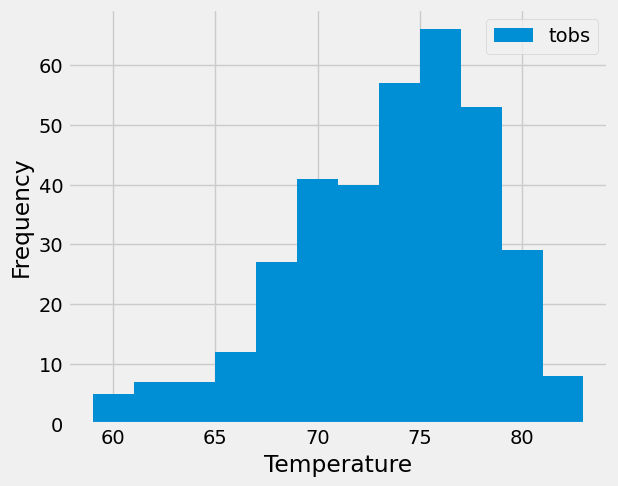

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()